In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from scipy.io import mmread
from scipy.sparse import csr_matrix
from anndata import AnnData,concat

Read HLCA dataset

In [2]:
hlca_all = sc.read_h5ad('data/local.h5ad')
hlca_all.var_names = hlca_all.var['feature_name']

/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:895: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [3]:
hlca_all.raw.var.index = hlca_all.var_names

Read Yale IPF dataset

In [4]:
anndata_yale_all = sc.read_h5ad('data/lung_combined_RNA.h5ad')
anndata_yale_all = anndata_yale_all[anndata_yale_all.obs['dataset'] == 'Kaminski',]
anndata_yale_all.var_names = anndata_yale_all.var['features']
anndata_yale_all.raw.var.index = anndata_yale_all.var.iloc[:,0]

/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [5]:
anndata_yale_all.X = anndata_yale_all.raw.X.copy()

Read Carraro dataset and add meta data infomration

In [6]:
# Non-smoker healthy donors
dd10 = sc.read_10x_h5("data/GSE143706/GSM4272918_dd10_filtered_feature_bc_matrix.h5")
dd39 = sc.read_10x_h5("data/GSE143706/GSM4272919_dd39_filtered_feature_bc_matrix.h5")

# Smoker healthy donors
cc04 = sc.read_10x_h5("data/GSE143706/GSM4272915_cc04_filtered_feature_bc_matrix.h5")
cc05 = sc.read_10x_h5("data/GSE143706/GSM4272916_cc05_filtered_feature_bc_matrix.h5")
dd09 = sc.read_10x_h5("data/GSE143706/GSM4272917_dd09_filtered_gene_bc_matrices_h5.h5")
cc49 = sc.read_10x_h5("data/GSE143706/GSM4272920_dd49_filtered_feature_bc_matrix.h5")

/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_

In [7]:
dd10.obs['age'] = 24
dd39.obs['age'] = 52
cc04.obs['age'] = 47
cc05.obs['age'] = 63
dd09.obs['age'] = 53
cc49.obs['age'] = 48

dd10.obs['donor_id'] = 'dd10'
dd39.obs['donor_id'] = 'dd39'
cc04.obs['donor_id'] = 'cc04'
cc05.obs['donor_id'] = 'cc05'
dd09.obs['donor_id'] = 'dd09'
cc49.obs['donor_id'] = 'cc49'

dd10.obs['smoking'] = "N"
dd39.obs['smoking'] = "N"
cc04.obs['smoking'] = 'Y'
cc05.obs['smoking'] = 'Y'
dd09.obs['smoking'] = 'Y'
cc49.obs['smoking'] = 'Y'

dd10.var_names_make_unique()
dd39.var_names_make_unique()
cc04.var_names_make_unique()
cc05.var_names_make_unique()
dd09.var_names_make_unique()
cc49.var_names_make_unique()

anndata_car = concat([dd10,dd39,cc04,cc05,dd09,cc49])
anndata_car.raw = anndata_car.copy()
anndata_car.obs["dataset"] = "Carraro"
anndata_car.obs_names_make_unique() # Avoid duplicates of cell barcodes

/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Read nuc-seq dataset

In [8]:
expr = mmread("data/leuven_merge_ALL.mtx") # Raw counts
cell_meta = pd.read_csv("data/leuven_merge_ALL_cellMeta.csv",index_col = 0)
gene_meta = pd.read_csv("data/leuven_merge_ALL_geneMeta.csv",index_col = 1)
anndata_nuc = AnnData(csr_matrix(expr).T, obs = cell_meta, var = gene_meta) 

/tmp/ipykernel_35908/3893048877.py:2: DtypeWarning: Columns (8,14,16,20,21,22,25,28,32,40,43,44,45,46,52,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_meta = pd.read_csv("data/leuven_merge_ALL_cellMeta.csv",index_col = 0)
/tmp/ipykernel_35908/3893048877.py:4: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  anndata_nuc = AnnData(csr_matrix(expr).T, obs = cell_meta, var = gene_meta)


In [9]:
anndata_nuc.raw = anndata_nuc

Check total counts and mitochondrial counts

In [10]:
anndata_nuc.var['mt'] =anndata_nuc.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(anndata_nuc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

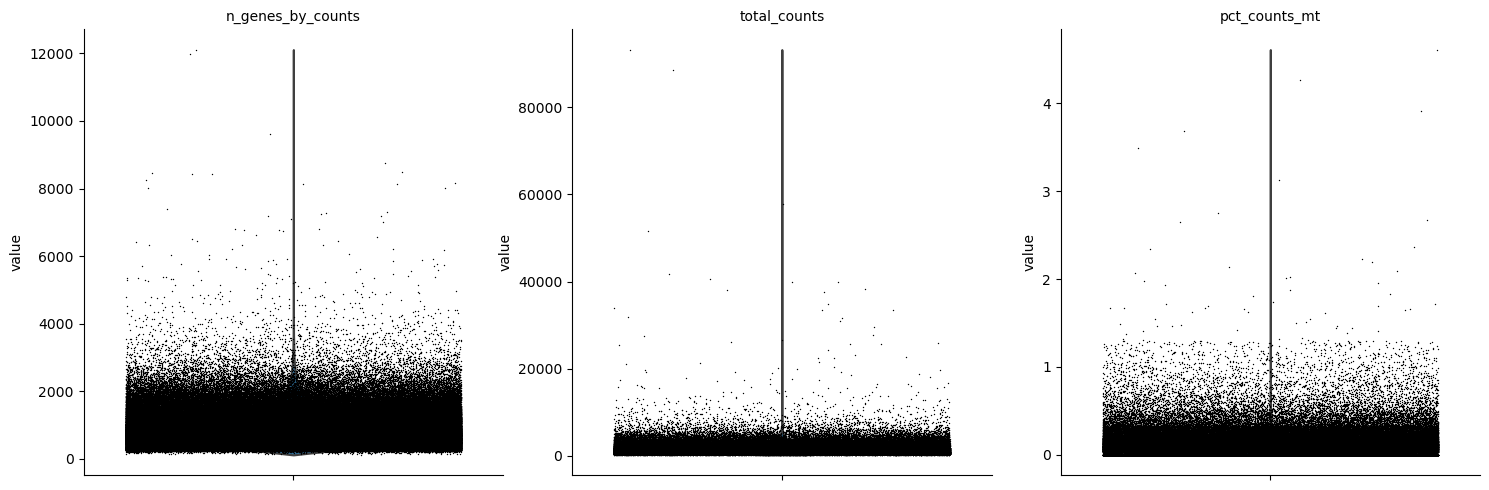

In [11]:
sc.pl.violin(anndata_nuc, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

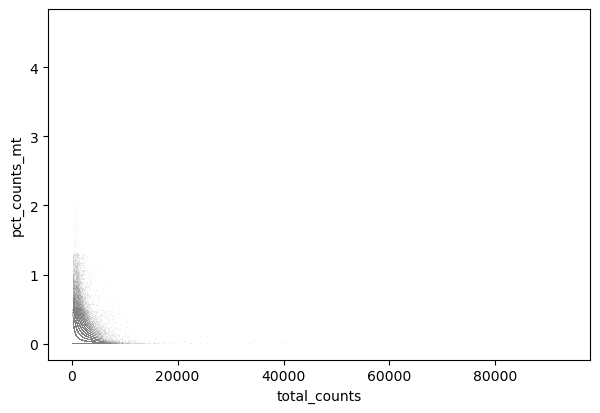

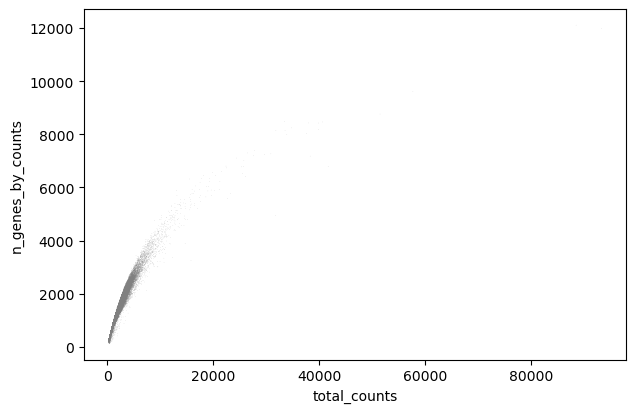

In [12]:
sc.pl.scatter(anndata_nuc, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(anndata_nuc, x='total_counts', y='n_genes_by_counts')

Normalization

In [13]:
sc.pp.normalize_total(anndata_yale_all, target_sum=1e4)
sc.pp.log1p(anndata_yale_all)

sc.pp.normalize_total(anndata_car, target_sum=1e4)
sc.pp.log1p(anndata_car)

In [14]:
sc.pp.normalize_total(anndata_nuc, target_sum=1e4)
sc.pp.log1p(anndata_nuc)

# Preprocessing 
removing cells with missing age information

In [15]:
hlca_all.obs['age_or_mean_of_age_range'] = hlca_all.obs['age_or_mean_of_age_range'].astype(float)
hlca_all = hlca_all[~pd.isna(hlca_all.obs['age_or_mean_of_age_range']),]
hlca_all.obs['age'] = hlca_all.obs['age_or_mean_of_age_range']

anndata_yale_all.obs['Age'] = anndata_yale_all.obs['Age'].astype(float)
anndata_yale_all = anndata_yale_all[~pd.isna(anndata_yale_all.obs['Age']),]

/jet/home/qsong/.conda/envs/lung_aging/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/tmp/ipykernel_35908/2726570644.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  hlca_all.obs['age'] = hlca_all.obs['age_or_mean_of_age_range']


Remove multiplets for Yale dataset

In [20]:
anndata_yale_all = anndata_yale_all[anndata_yale_all.obs['DF.classifications.adjusted'] == "Singlet",]

Further filtering for HLCA  
"anatomical_region_level_2" is no longer available in newer version of HLCA data

In [16]:
'''
to_remove = (hlca_all.obs['tissue'] == "nose") | \
(hlca_all.obs['subject_type'] == "alive_disease") | \
(hlca_all.obs['anatomical_region_level_2'] == "trachea") | \
(hlca_all.obs["ann_finest_level"].isin(["Club (nasal)","Goblet (nasal)","Multiciliated (nasal)","SMG serous (nasal)"]))
'''
to_remove = (hlca_all.obs['tissue'] == "nose") | \
(hlca_all.obs['subject_type'] == "alive_disease") | \
(hlca_all.obs["ann_finest_level"].isin(["Club (nasal)","Goblet (nasal)","Multiciliated (nasal)","SMG serous (nasal)"]))

In [17]:
hlca = hlca_all[~to_remove,].copy()

Check donor numbers

In [18]:
meta = hlca.obs
for st,df in meta.groupby('study'):
    smoker_df = df.loc[(df["smoking_status"] == "active") | (df["smoking_status"] == "former"),]
    nonsmoker_df = df.loc[df["smoking_status"] == "never",]
    smoker = smoker_df['donor_id'].unique().shape[0]
    nonsmoker = nonsmoker_df['donor_id'].unique().shape[0]
    
    basal_rows = nonsmoker_df["ann_level_3"] == "Basal"
    smc_rows = smoker_df["ann_level_2"] == "Smooth muscle"
    
    basal_counts = np.unique(nonsmoker_df.loc[basal_rows,]["donor_id"],return_counts = True)[1]
    smc_counts = np.unique(smoker_df.loc[smc_rows,]["donor_id"],return_counts = True)[1]
    
    basal_donors = basal_counts[basal_counts >= 20].shape[0]
    smc_donors = smc_counts[smc_counts >= 20].shape[0]
    
    level1 = np.unique(df['ann_level_1']).shape[0]
    level2 = np.unique(df['ann_level_2']).shape[0]
    level3 = np.unique(df['ann_level_3']).shape[0]
    level4 = np.unique(df['ann_level_4']).shape[0]
    level5 = np.unique(df['ann_level_5']).shape[0]
    print(f"{st}: {level1},{level2},{level3},{level4},{level5},smoker:{smoker}, nonsmoker{nonsmoker}(basal {basal_donors}, smc {smc_donors})")

Banovich_Kropski_2020: 4,11,25,38,12,smoker:23, nonsmoker13(basal 2, smc 5)
Barbry_Leroy_2020: 4,10,22,34,13,smoker:3, nonsmoker7(basal 7, smc 2)
Lafyatis_Rojas_2019: 4,10,22,33,12,smoker:1, nonsmoker5(basal 0, smc 0)
Meyer_2019: 4,10,22,30,10,smoker:1, nonsmoker2(basal 0, smc 1)
Misharin_2021: 4,10,25,37,13,smoker:0, nonsmoker0(basal 0, smc 0)
Misharin_Budinger_2018: 4,9,23,32,12,smoker:3, nonsmoker5(basal 0, smc 0)
Nawijn_2021: 4,10,23,36,12,smoker:2, nonsmoker8(basal 8, smc 1)
Seibold_2020: 3,7,14,24,8,smoker:7, nonsmoker7(basal 7, smc 0)
Teichmann_Meyer_2019: 4,10,22,32,11,smoker:6, nonsmoker0(basal 0, smc 1)


Add smoking status to nuc-seq anndata and add missing subject IDs to nuc-seq anndata

In [21]:
ids = []
for subject_id,cell in cell_meta.index.str.split("__"):
    if subject_id.startswith("D"):
        ids.append(subject_id.split("_")[1])
    else:
        ids.append(subject_id.split("_")[0])
ids = np.array(ids)

smoking_status = {
    '145':'N',
    '155':'N',
    '198':'N',
    '211':'N',
    '221':'Y',
    '222':'N',
    '246':'Y',
    '247':'N',
    '248':'N',
    '249':'N',
    '250':'N',
    '274':'N',
    '275':'N',
    '283':'N',
    '287':'Y',
    '302':'N',
    '304':'N',
    '318':'N',
    '331':'N',
    '351':'N',
    '354':'N',
    '49':'N',
    '62':'N',
    '94':'N'
}

anndata_nuc.obs["smoking"] = np.array([smoking_status[ID] for ID in ids])
anndata_nuc.obs["Subject.ID"] = ids

Split the data sets into two donor groups

In [22]:
hlca_smoker = hlca[(hlca.obs["smoking_status"] == "active") | (hlca.obs["smoking_status"] == "former"),]
hlca_nonsmoker = hlca[hlca.obs["smoking_status"] == "never",]

anndata_yale_smoker = anndata_yale_all[(anndata_yale_all.obs["Ever_Smoker"] == "Y"),]
anndata_yale_nonsmoker = anndata_yale_all[(anndata_yale_all.obs["Ever_Smoker"] == "N"),]

anndata_car_smoker = anndata_car[(anndata_car.obs["smoking"] == "Y"),]
anndata_car_nonsmoker = anndata_car[(anndata_car.obs["smoking"] == "N"),]

anndata_nuc_smoker = anndata_nuc[anndata_nuc.obs["smoking"] == "Y",]
anndata_nuc_nonsmoker = anndata_nuc[anndata_nuc.obs["smoking"] == "N",]

Filter cell and genes and check number of cells and genes before and after filtering

In [23]:
print("HLCA smoker: ",hlca_smoker.shape)
cells = sc.pp.filter_cells(hlca_smoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(hlca_smoker, min_cells=3, inplace = False)[0]
hlca_smoker = hlca_smoker[cells,genes]
print("HLCA smoker: ",hlca_smoker.shape)
print(f"Donors: {hlca_smoker.obs['donor_id'].unique().shape[0]}")
print("=====================")

print("HLCA Non-smoker: ",hlca_nonsmoker.shape)
cells = sc.pp.filter_cells(hlca_nonsmoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(hlca_nonsmoker, min_cells=3, inplace = False)[0]
hlca_nonsmoker = hlca_nonsmoker[cells,genes]
print("HLCA Non-smoker: ",hlca_nonsmoker.shape)
print(f"Donors: {hlca_nonsmoker.obs['donor_id'].unique().shape[0]}")
print("=====================")

print("Yale smoker: ",anndata_yale_smoker.shape)
cells = sc.pp.filter_cells(anndata_yale_smoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_yale_smoker, min_cells=3, inplace = False)[0]
anndata_yale_smoker = anndata_yale_smoker[cells,genes]
print("Yale smoker: ",anndata_yale_smoker.shape)
print(f"Donors: {anndata_yale_smoker.obs['subject.ident'].unique().shape[0]}")
print("=====================")

print("Yale non-smoker: ",anndata_yale_nonsmoker.shape)
cells = sc.pp.filter_cells(anndata_yale_nonsmoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_yale_nonsmoker, min_cells=3, inplace = False)[0]
anndata_yale_nonsmoker = anndata_yale_nonsmoker[cells,genes]
print("Yale non-smoker: ",anndata_yale_nonsmoker.shape)
print(f"Donors: {anndata_yale_nonsmoker.obs['subject.ident'].unique().shape[0]}")
print("=====================")

print("Carraro smoker: ",anndata_car_smoker.shape)
cells = sc.pp.filter_cells(anndata_car_smoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_car_smoker, min_cells=3, inplace = False)[0]
anndata_car_smoker = anndata_car_smoker[cells,genes]
print("Carraro smoker: ",anndata_car_smoker.shape)
print(f"Donors: {anndata_car_smoker.obs['donor_id'].unique().shape[0]}")
print("=====================")

print("Carraro non-smoker: ",anndata_car_nonsmoker.shape)
cells = sc.pp.filter_cells(anndata_car_nonsmoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_car_nonsmoker, min_cells=3, inplace = False)[0]
anndata_car_nonsmoker = anndata_car_nonsmoker[cells,genes]
print("Carraro non-smoker: ",anndata_car_nonsmoker.shape)
print(f"Donors: {anndata_car_nonsmoker.obs['donor_id'].unique().shape[0]}")
print("=====================")

print("Nuc-seq smoker: ",anndata_nuc_smoker.shape)
cells = sc.pp.filter_cells(anndata_nuc_smoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_nuc_smoker, min_cells=3, inplace = False)[0]
anndata_nuc_smoker = anndata_nuc_smoker[cells,genes]
print("Nuc-seq smoker: ",anndata_nuc_smoker.shape)
print(f"Donors: {anndata_nuc_smoker.obs['Subject.ID'].unique().shape[0]}")
print("=====================")

print("Nuc-seq non-smoker: ",anndata_nuc_nonsmoker.shape)
cells = sc.pp.filter_cells(anndata_nuc_nonsmoker, min_genes=100, inplace = False)[0]
genes = sc.pp.filter_genes(anndata_nuc_nonsmoker, min_cells=3, inplace = False)[0]
anndata_nuc_nonsmoker = anndata_nuc_nonsmoker[cells,genes]
print("Nuc-seq non-smoker: ",anndata_nuc_nonsmoker.shape)
print(f"Donors: {anndata_nuc_nonsmoker.obs['Subject.ID'].unique().shape[0]}")
print("=====================")

HLCA smoker:  (163557, 28024)
HLCA smoker:  (163557, 27537)
Donors: 46
HLCA Non-smoker:  (210919, 28024)
HLCA Non-smoker:  (210919, 27609)
Donors: 47
Yale smoker:  (22378, 48231)
Yale smoker:  (22378, 33931)
Donors: 8
Yale non-smoker:  (62470, 48231)
Yale non-smoker:  (62469, 38183)
Donors: 23
Carraro smoker:  (12999, 22164)
Carraro smoker:  (12700, 17300)
Donors: 4
Carraro non-smoker:  (4324, 22164)
Carraro non-smoker:  (4258, 16365)
Donors: 2
Nuc-seq smoker:  (46765, 60651)
Nuc-seq smoker:  (46765, 32551)
Donors: 3
Nuc-seq non-smoker:  (384680, 60651)
Nuc-seq non-smoker:  (384680, 39756)
Donors: 21


In [24]:
hlca_smoker.var.index.name = 'feature'
hlca_nonsmoker.var.index.name = 'feature'

In [25]:
anndata_car_smoker.var.index.name = 'feature'
anndata_car_nonsmoker.var.index.name = 'feature'
anndata_car_smoker.raw.var.index.name = 'feature'
anndata_car_nonsmoker.raw.var.index.name = 'feature'
anndata_yale_smoker.var.index.name = "feature"
anndata_yale_nonsmoker.var.index.name = "feature"
anndata_yale_nonsmoker.raw.var.columns = ['feature']
anndata_yale_smoker.raw.var.columns = ['feature']

In [26]:
del(anndata_yale_nonsmoker.var["_index"])
del(anndata_yale_smoker.var["_index"])

In [ ]:
hlca_smoker.write_h5ad("data/step1_HLCA_smoker_processed.h5ad")
hlca_nonsmoker.write_h5ad("data/step1_HLCA_nonsmoker_processed.h5ad")

anndata_yale_smoker.write_h5ad("data/step1_yale_smoker_processed.h5ad")
anndata_yale_nonsmoker.write_h5ad("data/step1_yale_nonsmoker_processed.h5ad")

anndata_car_smoker.write_h5ad("data/step1_car_smoker_processed.h5ad")
anndata_car_nonsmoker.write_h5ad("data/step1_car_nonsmoker_processed.h5ad")

anndata_nuc_smoker.write_h5ad("data/step1_nuc_smoker_processed.h5ad")
anndata_nuc_nonsmoker.write_h5ad("data/step1_nuc_nonsmoker_processed.h5ad")

Also merge the datasets for downstream analyses

In [29]:
anndata_yale_smoker.obs = anndata_yale_smoker.obs.loc[:,["Age","Sex","subject.ident","dataset"]]
anndata_yale_nonsmoker.obs = anndata_yale_nonsmoker.obs.loc[:,["Age","Sex","subject.ident","dataset"]]

anndata_car_smoker.obs = anndata_car_smoker.obs.loc[:,["age","donor_id","dataset"]]
anndata_car_nonsmoker.obs = anndata_car_nonsmoker.obs.loc[:,["age","donor_id","dataset"]]

anndata_yale_smoker.obs.columns = ["age","sex","donor_id","dataset"]
anndata_yale_nonsmoker.obs.columns = ["age","sex","donor_id","dataset"]
anndata_car_smoker.obs.columns = ["age","donor_id","dataset"]
anndata_car_nonsmoker.obs.columns = ["age","donor_id","dataset"]

In [30]:
combined_smoker = concat([anndata_yale_smoker, anndata_car_smoker])
combined_nonsmoker = concat([anndata_yale_nonsmoker, anndata_car_nonsmoker])

In [31]:
combined_smoker.write_h5ad("data/step1_combined_smoker_processed.h5ad")
combined_nonsmoker.write_h5ad("data/step1_combined_nonsmoker_processed.h5ad")